# Market research survey 

# Imports 

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 7)

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [88]:
def show_pct(vals):
    return vals.value_counts().divide(len(vals)).to_frame().style.format('{:,.0%}')

# Load data

In [175]:
df = pd.read_csv('../data/survey_response_data.csv.zip')
new_cols = ['timestamp', 'prolific_id', 'city', 'state', 'zip', 'country', 'gender', 'age', 'income', 'yelp_tt_tr', 'any_app_purchase', '_', 'expert_app_usage', 'expert_app_yearly_cnt', 'expert_category',
              'px_bargain', 'px_expensive', 'px', 'describe_time', 'thoughts']
questions = {k:v for k,v in zip(new_cols, df.columns)}
df.columns = new_cols
expert_categories = pd.get_dummies(df.expert_category.str.split(';').apply(pd.Series).stack(), prefix='category').groupby(level=0).sum()
expert_categories.columns = expert_categories.columns.str.lower().str.replace('&', 'and').str.replace(' ', '_')
df = pd.concat([df, expert_categories], axis=1)
df.px = df.px.str.replace('+', '', regex=False).str.replace('$', '', regex=False).astype(float)

In [176]:
for col in ['expert_app_yearly_cnt', 'yelp_tt_tr']:
    new_col = col + '_coded'
    df[new_col] = np.nan
    df.loc[df[col].eq('Never'), new_col] = 0
    df.loc[df[col].eq('1-5 times'), new_col] = 3
    df.loc[df[col].eq('6-10 times'), new_col] = 8
    df.loc[df[col].eq('More than 10 times'), new_col] = 10

for col in ['any_app_purchase', 'expert_app_usage']:
    new_col = col + '_coded'
    df[new_col] = np.nan
    df.loc[df[col].eq('Not at all likely'), new_col] = -2
    df.loc[df[col].eq('Not very likely'), new_col] = -1
    df.loc[df[col].eq('Somewhat likely'), new_col] = 0
    df.loc[df[col].eq('Very likely'), new_col] = 1
    df.loc[df[col].eq('Extremely likely'), new_col] = 2

# Analysis

## Demographics

In [91]:
df.state.value_counts().nlargest(10).to_frame()

State / Province


,state
Florida,9
Texas,8
CA,7
California,6
NC,5
Utah,5
NJ,4
Pennsylvania,4
NY,4
TN,3


In [78]:
show_pct(df.gender)

,gender
Female,81%
Male,17%
Other,2%


In [79]:
show_pct(df.age)

,age
21-29,52%
18-20,24%
30-39,15%
40-49,6%
50-59,2%
60 or older,1%


In [80]:
show_pct(df.income.str.replace('$', '\$', regex=False))

,income
"Between \$50,000 and \$74,999",35%
"Between \$75,000 and \$99,999",24%
"Between \$100,000 and \$150,000",22%
"Over \$150,000",10%
"Between \$30,000 and \$49,999",7%
"Between \$15,000 and \$29,999",1%
"Under \$15,000",1%


## App usage

In [95]:
print(questions['yelp_tt_tr'], '\n')
show_pct(df.yelp_tt_tr)

In a year, how many times do you hire professionals through apps like Yelp, Thumbtack, or TaskRabbit? 



,yelp_tt_tr
Never,85%
1-5 times,11%
6-10 times,2%
More than 10 times,2%


In [96]:
print(questions['any_app_purchase'], '\n')
show_pct(df.any_app_purchase)

On a typical day, how likely are you to make a purchase using an app? 



,any_app_purchase
Somewhat likely,43%
Very likely,23%
Not very likely,19%
Extremely likely,13%
Not at all likely,2%


## Expert app

In [97]:
print(questions['expert_app_usage'], '\n')
show_pct(df.expert_app_usage)

Assuming the price was reasonable, how likely would you be to consider using this app? 



,expert_app_usage
Very likely,37%
Somewhat likely,34%
Extremely likely,17%
Not very likely,12%
Not at all likely,1%


In [99]:
print(questions['expert_app_yearly_cnt'], '\n')
show_pct(df.expert_app_yearly_cnt)

In a year, how many times would you consider using this app? 



,expert_app_yearly_cnt
1-5 times,44%
6-10 times,29%
More than 10 times,24%
Never,2%


In [136]:
summary = df.expert_app_yearly_cnt_coded.groupby(df.age).mean().to_frame().style.format('{:,.1f}')
summary['

,expert_app_yearly_cnt_coded
age,
18-20,6.7
21-29,6.1
30-39,6.2
40-49,4.1
50-59,3.7
60 or older,10.0


In [137]:
df.expert_app_yearly_cnt_coded.groupby(df.gender).mean().to_frame().style.format('{:,.1f}')

,expert_app_yearly_cnt_coded
gender,
Female,6.1
Male,6.4
Other,5.3


## Categories

In [146]:
expert_categories.mean().rename('Category').sort_values(ascending=False).to_frame().style.format('{:,.0%}')

,Category
category_medical,69%
category_therapy,65%
category_financial,60%
category_travel,57%
category_home_and_car_repair,55%
category_beauty_and_fashion,49%
category_career_advice,45%
category_coaching_and_personal_development,38%
category_legal,38%
category_tutoring,35%


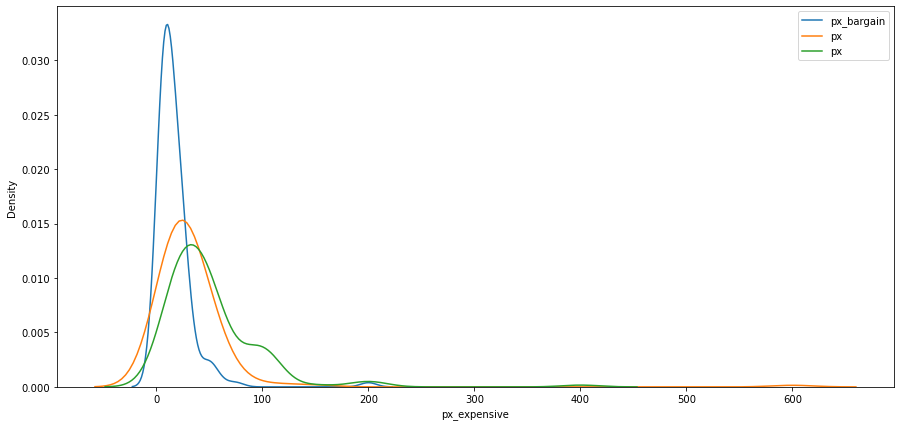

,px_bargain,px,px_expensive
count,136.0,136.0,136.0
mean,16.8,33.3,51.6
std,20.2,53.3,47.5
min,0.0,2.0,5.0
25%,5.0,15.0,20.0
50%,10.0,25.0,40.0
75%,20.0,40.0,50.0
max,200.0,600.0,400.0


In [198]:
px = df[['px_bargain', 'px', 'px_expensive']]
sns.distplot(df.px_bargain, kde=True, hist=False, label='px_bargain')
sns.distplot(df.px, kde=True, hist=False, label='px')
sns.distplot(df.px_expensive, kde=True, hist=False, label='px')
plt.legend()
plt.show()
px.describe().style.format('{:,.1f}')

In [207]:
px_by_category = []
for category in expert_categories.columns:
    px_by_category.append(df.loc[df[category].eq(1), ['px_bargain', 'px', 'px_expensive']].mean().rename(category))
px_by_category = pd.concat(px_by_category, axis=1).T

In [210]:
px_by_category.sort_values(by='px', ascending=False).style.format('{:,.0f}')

,px_bargain,px,px_expensive
category_business_consulting,27,60,75
category_financial,20,40,59
category_legal,19,38,51
category_coaching_and_personal_development,17,35,57
category_travel,17,33,57
category_computers_and_it,17,31,50
category_medical,17,31,53
category_tutoring,15,31,52
category_career_advice,17,31,51
category_home_and_car_repair,17,31,50


## Describe a scenario

In [227]:
df[['describe_time']].dropna().style.set_properties(**{'text-align': 'left'})

,describe_time
51,I would use it if something was broken in my apartment (like a faucet) and I could quickly use the app to have an expert walk me through fixing it.
52,Needing medical assistance not severe enough to go to a clinic/hospital
53,If my fridge was making a weird noise
54,Advice on saving for retirement because I have no idea what to do or where to start
55,If I was in need of therapy but did not have time to see a specialist in person.
56,"I would use this app for reading leases for my college homes. Landlords tend to take advantage of college students, since we are very unaware of what our rights are. The leases can be up to 40-60 pages, so having a lawyer's advice would be helpful in knowing what kind of action we can take in instances where our landlord is unfair."
57,"I would use it as a last resort, but I think it would be really successful during the pandemic."
58,How to advice for home repair
59,"If I accidentally lock my keys in my car, and am away from home."
60,My car was making a weird noise whenever I braked and i actually ended up calling my friends uncle who is a mechanic but if i didnt have her I would have loved to have this app.


## Thoughts

In [225]:
df[['thoughts']].dropna().style.set_properties(**{'text-align': 'left'})

,thoughts
0,Good idea
1,I would definitely take advantage if it was reasonably priced. I also think the “experts” would need to be vetted properly.
2,sounds like it could be useful
3,"I really like this idea, I think it would be an incredibly useful app that I would use quite often."
4,"I think it's a pretty good idea. I think especially now that times have changed because of the pandemic, that a lot of people would consider using it."
5,I think its a great idea and something that should happen
6,As long as they are true verified professionals it seems like a good idea
7,"I like it, the only problem I see is I can solve a lot of my problems by googling things on the internet."
8,Pretty smart idea
9,"The app sounds like it could be very useful. Considering sites such as Yelp are free, they do not offer professional recommendations or solutions to problems. Virtual connections are becoming a large part of everyday life, meaning the convenience would more than likely be quite appealing to most individuals."
